# Notebook 02 - Data Preparation
by __Pawel Rosikiewicz__ www.SimpleAI.ch

---

![outliers_slide_01](images/Slide7.jpeg)

## I implemented perfomrance reports and selection tools for sklearn models

![outliers_slide_01](images/Slide4.jpeg)
![outliers_slide_01](images/Slide5.jpeg)

__Important comment__, high level reports were not applied, because i used onlty two methods, and one dataset preprocessing procedure, but the functions are available, and you may check my other projects eg. SkinDiagnosticAI, for examples of implemnting these methods

## Setup
---

In [1]:
import os
import sys
import re # module to use regular expressions, 
import glob # lists names in folders that match Unix shell patterns
import warnings
    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns
import scipy.stats as stats

from IPython.display import Image # to import one image and display in jupyter
# feature transformations
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer # creates custom transfomers
from sklearn.compose import ColumnTransformer # allows using different transformers to different columns
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, KBinsDiscretizer # skleanr transformers
from sklearn.preprocessing import RobustScaler # creates custom transfomers

# classifiers used
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC

In [2]:
# basedir
basedir = os.path.dirname(os.getcwd())
os.chdir(basedir)
sys.path.append(basedir)
print(basedir)

/Users/pawel/Desktop/activities/100__Projects/LTSM_for_Antibiodies/LTSM_for_Antibodies


In [3]:
# paths
PATH_data_raw     = os.path.join(basedir, "data/raw")
PATH_data_interim = os.path.join(basedir, "data/interim")
PATH_results      = os.path.join(basedir, "data/results")
PATH_models       = os.path.join(basedir, "models")

In [4]:
# load project configs
from src.configs.filenames_and_colors import organisms, colors 
from src.configs.filenames_and_colors import filenames_aa_seq, filenames_aa_seq_vlen

# model traning and selection tools
from src.utils.helper_merge_dfs import merge_data
from src.utils.Model_Evaluation_PIPELINE   import train_and_evaluate_models

# model evaluation and summary tools
from src.utils.FastClassAI_model_summary_tools import model_summary_plot # legacy function, from 2 years ago, on 
from src.utils.Model_Summary_TOOLS import load_predictions_and_stats 
from src.utils.Model_Summary_TOOLS import modify_model_statistics_df
from src.utils.Model_Summary_TOOLS import create_group_top_model_list
from src.utils.Model_Summary_TOOLS import modified_model_stats_and_plot_ROC_curves
from src.utils.Model_Summary_TOOLS import play_with_rocks
from src.utils.Model_Summary_TOOLS import * # to be sure

In [5]:
# columns displayed in summary table after each model is finished
display_in_summary_table=[
    "model_id","model_name",
    'dataset_name','rand_nr','model_params', 
    'Acc', 'ROC_AUC', 'Recall', 'Presision', 'F1', 
    'counts_y', 'counts_y_hat']

## __LOGISTIC REGRESSION__

In [6]:
# model
model = LogisticRegression() # Must be true otherwise it doest allow predict_proba
model_name = "logreg"

# data
path_in = PATH_data_interim
path_out = PATH_data_interim
dataset_name_list = ["AAseq_10p10r"] # 6 dataset varinats prepared in different way, 
rand_nr_list = [0, 1, 2, 3]

# model parameters,
param_grid = ParameterGrid({  
            'C': np.logspace(-4, 4, num=10),
            "penalty":['l2'],
            "class_weight": [None]
        })

# train and evaluate models
stats_valid, stats_test, _, _= train_and_evaluate_models(
    model_name,
    dataset_name_list, 
    rand_nr_list, 
    param_grid, 
    model, 
    path_in=PATH_data_interim,
    path_out=PATH_results,
    none_at=None,
    verbose=False,
    b_verbose=True,
    save_predictions=True,
    subset=0.1,
    subset_all=False,
    shuffle_train=True,
    positive_class=0,
)

----------------------------------------------------
model_name: logreg
cond nr: 10
dataset nr: 1
cv nr: 4
----------------------------------------------------

Trainig: AAseq_10p10r  v 0
Loading: Processed_AAseq_10p10r_onehotenc_v0_dct.p
train - X:(60100, 325), y:(60100,)
valid - X:(257569, 325), y:(257569,)
test - X:(151512, 325), y:(151512,)

model_id: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

Trainig: AAseq_10p10r  v 1
Loading: Processed_AAseq_10p10r_onehotenc_v1_dct.p
train - X:(60100, 325), y:(60100,)
valid - X:(257569, 325), y:(257569,)
test - X:(151512, 325), y:(151512,)

model_id: 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 

Trainig: AAseq_10p10r  v 2
Loading: Processed_AAseq_10p10r_onehotenc_v2_dct.p
train - X:(60100, 325), y:(60100,)
valid - X:(257569, 325), y:(257569,)
test - X:(151512, 325), y:(151512,)

model_id: 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 

Trainig: AAseq_10p10r  v 3
Loading: Processed_AAseq_10p10r_onehotenc_v3_dct.p
train - X:(60100, 325), y:(60100,)
valid - X:(257569, 

In [7]:
# display top ten performing models
display(stats_valid.loc[:, display_in_summary_table].sort_values("ROC_AUC", ascending=False).head(5))

,model_id,model_name,dataset_name,rand_nr,model_params,Acc,ROC_AUC,Recall,Presision,F1,counts_y,counts_y_hat
28,28,logreg,AAseq_10p10r,2,"{'C': 1291.5496650148827, 'class_weight': None...",0.976309,0.998614,0.988558,0.964445,0.976353,"{0: 130140, 1: 127429}","{0: 126954, 1: 130615}"
19,19,logreg,AAseq_10p10r,1,"{'C': 10000.0, 'class_weight': None, 'penalty'...",0.971142,0.998448,0.990019,0.953357,0.971342,"{0: 130332, 1: 127237}","{0: 125439, 1: 132130}"
18,18,logreg,AAseq_10p10r,1,"{'C': 1291.5496650148827, 'class_weight': None...",0.971674,0.998445,0.989736,0.954594,0.971847,"{0: 130332, 1: 127237}","{0: 125648, 1: 131921}"
29,29,logreg,AAseq_10p10r,2,"{'C': 10000.0, 'class_weight': None, 'penalty'...",0.974477,0.998421,0.987852,0.961606,0.974553,"{0: 130140, 1: 127429}","{0: 126662, 1: 130907}"
27,27,logreg,AAseq_10p10r,2,"{'C': 166.81005372000558, 'class_weight': None...",0.968657,0.998380,0.991721,0.947388,0.969048,"{0: 130140, 1: 127429}","{0: 124177, 1: 133392}"


## __RANDOM FOREST__

__Compared conditions__
- __max depth__ (4-6); I triend deeper on some examples, but it was not improving models, 
- __tree number__ (1-200)

In [9]:
# model
model = RandomForestClassifier()
model_name = "random_forest"

# data
path_in = PATH_data_interim
path_out = PATH_results
dataset_name_list = ["AAseq_10p10r"] # 6 dataset varinats prepared in different way, 
rand_nr_list = [0, 1, 2, 3]

# model parameters,
param_grid = ParameterGrid({  
            'max_depth':[4,5,6],
            'n_estimators': [10,25,50,100,150, 200]
        })

# train and evaluate models
stats_valid, stats_test, _, _= train_and_evaluate_models(
    model_name,
    dataset_name_list, 
    rand_nr_list, 
    param_grid, 
    model, 
    path_in=PATH_data_interim,
    path_out=PATH_results,
    none_at=None,
    verbose=False,
    b_verbose=True,
    save_predictions=True,
    subset=0.1,
    subset_all=False,
    shuffle_train=True,
    positive_class=0,
)

----------------------------------------------------
model_name: random_forest
cond nr: 18
dataset nr: 1
cv nr: 4
----------------------------------------------------

Trainig: AAseq_10p10r  v 0
Loading: Processed_AAseq_10p10r_onehotenc_v0_dct.p
train - X:(60100, 325), y:(60100,)
valid - X:(257569, 325), y:(257569,)
test - X:(151512, 325), y:(151512,)

model_id: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 

Trainig: AAseq_10p10r  v 1
Loading: Processed_AAseq_10p10r_onehotenc_v1_dct.p
train - X:(60100, 325), y:(60100,)
valid - X:(257569, 325), y:(257569,)
test - X:(151512, 325), y:(151512,)

model_id: 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 

Trainig: AAseq_10p10r  v 2
Loading: Processed_AAseq_10p10r_onehotenc_v2_dct.p
train - X:(60100, 325), y:(60100,)
valid - X:(257569, 325), y:(257569,)
test - X:(151512, 325), y:(151512,)

model_id: 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 

Trainig: AAseq_10p10r  v 3
Lo

In [10]:
# display top ten performing models
display(stats_valid.loc[:, display_in_summary_table].sort_values("ROC_AUC", ascending=False).head(5))

,model_id,model_name,dataset_name,rand_nr,model_params,Acc,ROC_AUC,Recall,Presision,F1,counts_y,counts_y_hat
63,63,random_forest,AAseq_10p10r,3,"{'max_depth': 5, 'n_estimators': 100}",0.936751,0.994051,0.989211,0.894580,0.939519,"{0: 129656, 1: 127913}","{0: 116125, 1: 141444}"
70,70,random_forest,AAseq_10p10r,3,"{'max_depth': 6, 'n_estimators': 150}",0.904228,0.993329,0.993175,0.842245,0.911504,"{0: 129656, 1: 127913}","{0: 106734, 1: 150835}"
13,13,random_forest,AAseq_10p10r,0,"{'max_depth': 6, 'n_estimators': 25}",0.941158,0.992751,0.982908,0.906114,0.942950,"{0: 130138, 1: 127431}","{0: 119338, 1: 138231}"
34,34,random_forest,AAseq_10p10r,1,"{'max_depth': 6, 'n_estimators': 150}",0.904410,0.992593,0.993807,0.841411,0.911282,"{0: 130332, 1: 127237}","{0: 107287, 1: 150282}"
28,28,random_forest,AAseq_10p10r,1,"{'max_depth': 5, 'n_estimators': 150}",0.928520,0.992375,0.986922,0.882329,0.931699,"{0: 130332, 1: 127237}","{0: 115249, 1: 142320}"


## PART 2. __COMPARE MODELS CREATED WITH ALL METHODS AND PLAY WITH THRESHOLDS__

In [11]:
# params
model_name_list = ["logreg", "random_forest"] 

# extraxt data
model_statistics_df, model_predictions_valid, model_predictions_test = load_predictions_and_stats(
    PATH_results, model_name_list, verbose=True)

# reset index
model_statistics_df.reset_index(inplace=True, drop=True)

loading_df 0 logreg__model_statistics_valid_df.p shape_total: (40, 16)
loading_df 1 random_forest__model_statistics_valid_df.p shape_total: (112, 16)
loading_df 0 logreg__model_predictions_list.p shape_total: 40
loading_df 1 random_forest__model_predictions_list.p shape_total: 112


__calculate means for models created with different CV iterations__

In [12]:
model_statistics_means = modify_model_statistics_df(model_statistics_df)

### __select top n, models created wiht each algorithm__
* __ID__; model id number used to find model predicitons and 

In [13]:
top_models = create_group_top_model_list(
    model_statistics_means, 
    order_models_by="ROC_AUC", 
    groupby="model_name", 
    n=5
)
top_models.reset_index(drop=True, inplace=True)
display(top_models.sort_values(by="ROC_AUC", ascending=False))

,model_name,dataset_name,ID,ROC_AUC,Presision,Recall,F1,tr,counts_y,counts_y_hat,model_params
0,logreg,AAseq_10p10r,3,0.998,0.944,0.990,0.966,0.5,"{0: 130138, 1: 127431}","{0: 124211, 1: 133358}","{'C': 0.046415888336127774, 'class_weight': No..."
1,logreg,AAseq_10p10r,4,0.998,0.943,0.991,0.966,0.5,"{0: 130138, 1: 127431}","{0: 123766, 1: 133803}","{'C': 0.3593813663804626, 'class_weight': None..."
2,logreg,AAseq_10p10r,5,0.998,0.942,0.991,0.966,0.5,"{0: 130138, 1: 127431}","{0: 123489, 1: 134080}","{'C': 2.782559402207126, 'class_weight': None,..."
3,logreg,AAseq_10p10r,6,0.998,0.941,0.992,0.966,0.5,"{0: 130138, 1: 127431}","{0: 123205, 1: 134364}","{'C': 21.54434690031882, 'class_weight': None,..."
4,logreg,AAseq_10p10r,7,0.998,0.940,0.992,0.965,0.5,"{0: 130138, 1: 127431}","{0: 122803, 1: 134766}","{'C': 166.81005372000558, 'class_weight': None..."
5,random_forest,AAseq_10p10r,49,0.992,0.879,0.986,0.930,0.5,"{0: 130138, 1: 127431}","{0: 115633, 1: 141936}","{'max_depth': 5, 'n_estimators': 100}"
6,random_forest,AAseq_10p10r,56,0.991,0.846,0.991,0.913,0.5,"{0: 130138, 1: 127431}","{0: 108090, 1: 149479}","{'max_depth': 6, 'n_estimators': 150}"
7,random_forest,AAseq_10p10r,51,0.990,0.859,0.987,0.918,0.5,"{0: 130138, 1: 127431}","{0: 113125, 1: 144444}","{'max_depth': 5, 'n_estimators': 200}"
8,random_forest,AAseq_10p10r,50,0.989,0.873,0.982,0.924,0.5,"{0: 130138, 1: 127431}","{0: 114211, 1: 143358}","{'max_depth': 5, 'n_estimators': 150}"
9,random_forest,AAseq_10p10r,55,0.989,0.825,0.991,0.901,0.5,"{0: 130138, 1: 127431}","{0: 108969, 1: 148600}","{'max_depth': 6, 'n_estimators': 100}"


## PART 3. __GENRATE MODEL PERFORMANCE REPORT__
__function below allows to:__
* examine each model visually,
* you may play with thresholds
* and decide which model prediciton to deliver  

__model selected__
* you may generate report for any model with ID number (ID parameter)
* you may also generate this report for test or validation data (as you wish)

---------------------------------------------------------------------------------------------------
TITLE:  Model report for validation dataset
CLASSES:  {0: 'human', 1: 'mouse'}
POSITIVE CLASS:  0
MODEL ID:  3
THRESHOLD:  0.5
...............................................................................................


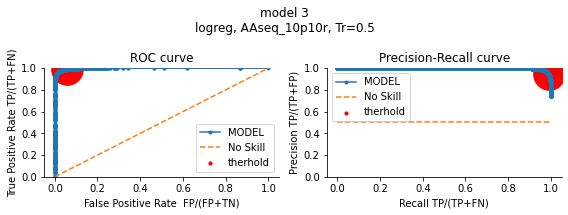

...............................................................................................
MODEL PERFORMANCE


,ID,model_name,dataset_name,Acc_baseline,Acc,ROC_AUC,Recall,Presision,F1,tr,counts_y,counts_y_hat,model_params
0,None,logreg,AAseq_10p10r,0.505255,0.966203,0.997751,0.9891,0.94514,0.966621,0.5,"{0: 130138, 1: 127431}","{0: 124211, 1: 133358}","{'C': 0.046415888336127774, 'class_weight': No..."


...............................................................................................
MODEL PREDICTIONS:  Validation Data
True labels:                                      {0: 130138, 1: 127431}
Predictions made with standard threshold (tr=0.5): {0: 124211, 1: 133358}
Predictions made with adjusted threshold (tr=0.5): {0: 133358, 1: 124211}
---------------------------------------------------------------------------------------------------




In [14]:
prediciton_test_adjusted = play_with_rocks(
    ID = top_models.ID.iloc[0],
    # ...
    title="Model report for validation dataset",
    subtitle="Validation Data",
    class_description=dict(zip(list(range(len(organisms))), organisms)),
    # ...
    threshold = 0.5,
    predictions = model_predictions_valid,
    predictions_second_set = None,
    positive_class=0
)